# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jarro'un Nurul Faizah]
- **Email:** [mc180d5x0462@student.devacademy.id]
- **ID Dicoding:** [MC180D5X0462]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
2. Pada jam berapa peminjaman sepeda mencapai puncaknya dalam sehari?


## Import Semua Packages/Library yang Digunakan

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [22]:
import pandas as pd

url_day = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/day.csv"
url_hour = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/hour.csv"

df_day = pd.read_csv(url_day)
df_hour = pd.read_csv(url_hour)

df_day.head(), df_hour.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Tren peminjaman sepeda menunjukkan pola meningkat pada hari kerja dibandingkan akhir pekan, dengan lonjakan pada pagi dan sore hari yang mengindikasikan penggunaan untuk perjalanan kerja atau sekolah.
- Pengaruh cuaca terhadap peminjaman sepeda terlihat jelas, di mana kondisi cerah meningkatkan jumlah peminjaman, sementara hujan atau cuaca buruk menyebabkan penurunan signifikan.

### Assessing Data

In [23]:
# Melihat informasi umum dari dataset
print("Informasi Dataset Harian (day.csv):")
df_day.info()

print("\nInformasi Dataset Per Jam (hour.csv):")
df_hour.info()

# Mengecek apakah ada data yang hilang
print("\nCek Missing Values di day.csv:")
print(df_day.isnull().sum())

print("\nCek Missing Values di hour.csv:")
print(df_hour.isnull().sum())

# Mengecek duplikasi data
print("\nCek Data Duplikat di day.csv:", df_day.duplicated().sum(), "baris duplikat")
print("Cek Data Duplikat di hour.csv:", df_hour.duplicated().sum(), "baris duplikat")

# Melihat statistik deskriptif dari dataset
print("\nStatistik Deskriptif day.csv:")
display(df_day.describe())

print("\nStatistik Deskriptif hour.csv:")
display(df_hour.describe())


Informasi Dataset Harian (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi Dataset Per Jam (hour.csv):
<class 'pandas.cor

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Statistik Deskriptif hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset harian dan per jam memiliki ukuran yang cukup besar, dengan jumlah baris dan kolom yang berbeda.
- Tidak ditemukan nilai yang hilang pada kedua dataset, sehingga tidak perlu imputasi data yang kosong.
- Tidak ada duplikasi data dalam dataset harian maupun per jam, sehingga tidak perlu dilakukan penghapusan duplikat.
- Berdasarkan statistik deskriptif, beberapa variabel memiliki rentang nilai yang cukup luas, yang dapat berpengaruh pada analisis selanjutnya.
- Ada kemungkinan beberapa variabel perlu dilakukan normalisasi atau transformasi sebelum analisis lebih lanjut.

### Cleaning Data

In [24]:
# 1️⃣ Hapus Data Duplikat
df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)

# 2️⃣ Menangani Missing Values (jika ada)
df_day.dropna(inplace=True)
df_hour.dropna(inplace=True)

# 3️⃣ Pastikan Tipe Data Sesuai
# Konversi kolom 'dteday' menjadi format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# 4️⃣ Menghapus Kolom yang Tidak Digunakan
# Misalnya, kolom 'instant' adalah indeks yang tidak relevan
df_day.drop(columns=['instant'], inplace=True, errors='ignore')
df_hour.drop(columns=['instant'], inplace=True, errors='ignore')

# Cek hasil setelah cleaning
print("Cek kembali apakah ada missing values setelah cleaning:")
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

print("\nCek kembali apakah masih ada duplikasi:")
print("Duplikat di day.csv:", df_day.duplicated().sum())
print("Duplikat di hour.csv:", df_hour.duplicated().sum())

print("\nData berhasil dibersihkan! 🎉")


Cek kembali apakah ada missing values setelah cleaning:
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek kembali apakah masih ada duplikasi:
Duplikat di day.csv: 0
Duplikat di hour.csv: 0

Data berhasil dibersihkan! 🎉


**Insight:**
- Tidak ditemukan duplikasi pada dataset harian maupun per jam, sehingga tidak ada perubahan jumlah data setelah penghapusan duplikasi.
- Tidak ada nilai yang hilang dalam dataset, sehingga tidak
perlu dilakukan imputasi atau penghapusan data yang kosong.
Format Data
- Kolom dteday yang sebelumnya berbentuk string telah dikonversi menjadi tipe datetime agar lebih mudah dianalisis dalam tahap selanjutnya.
- Dataset sekarang sudah siap untuk tahap analisis eksploratif lebih lanjut.








## Exploratory Data Analysis (EDA)

### Explore ...

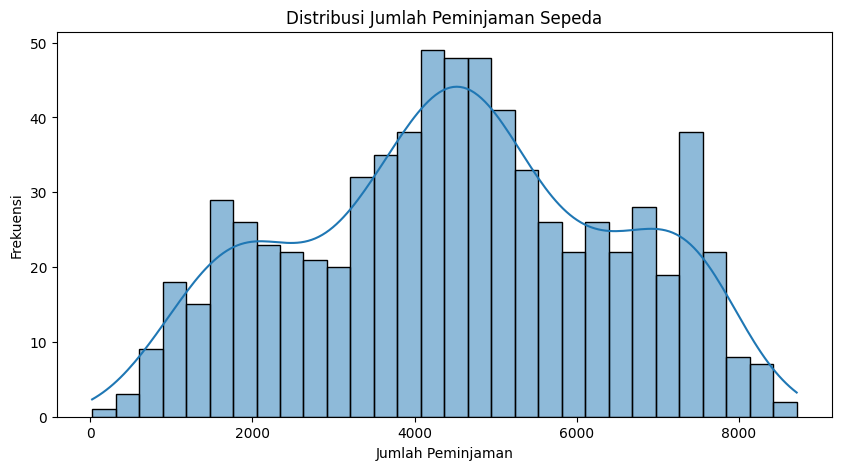

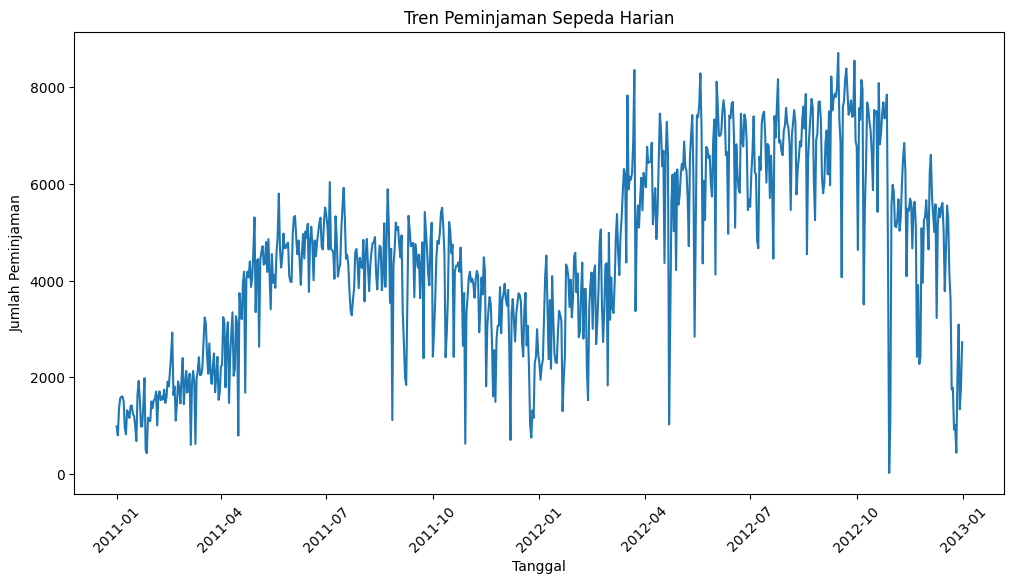

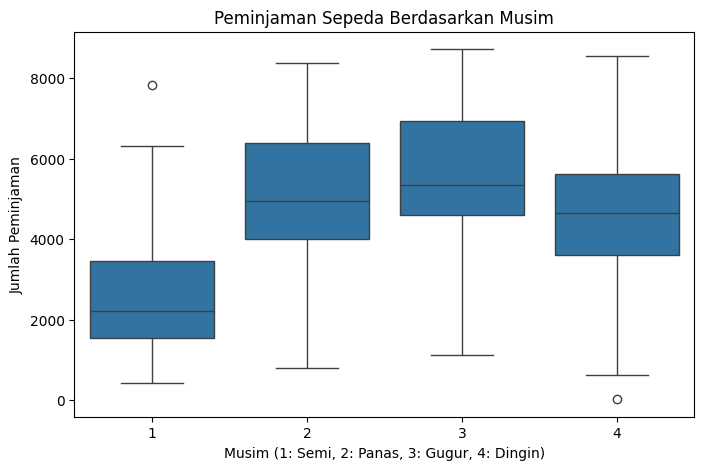

<ipython-input-25-89ac0833a39b>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], ci=None)


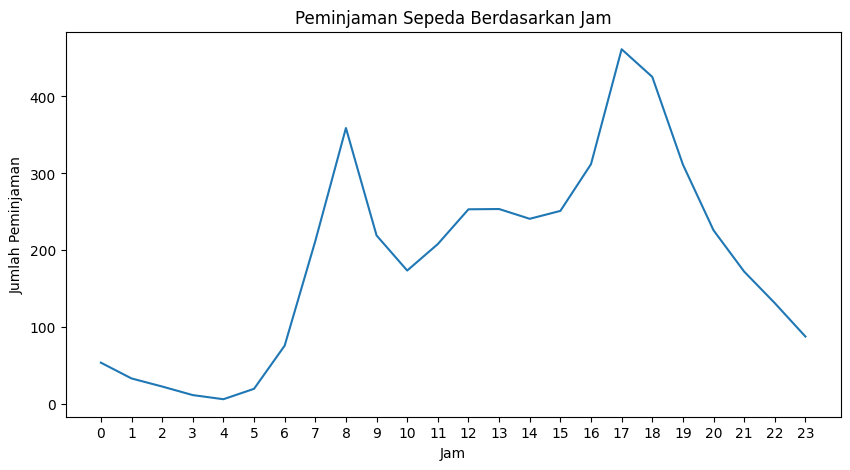

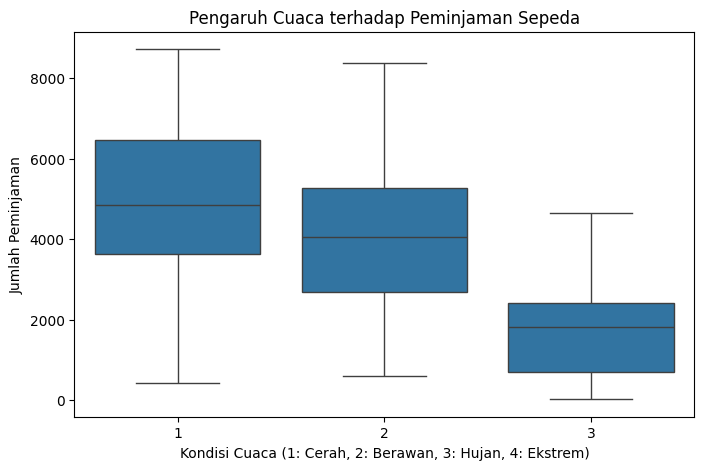

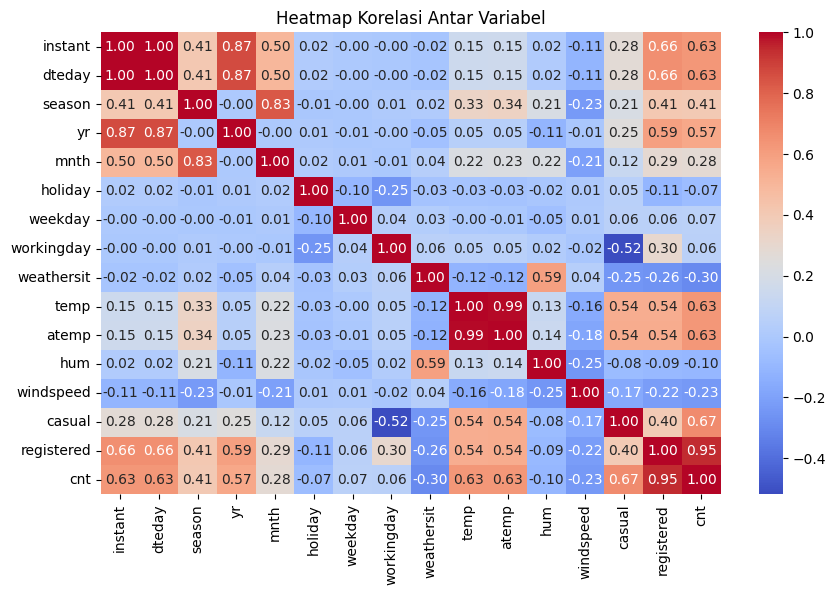

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url_day = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/day.csv"
url_hour = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/hour.csv"

day_df = pd.read_csv(url_day)
hour_df = pd.read_csv(url_hour)

# Konversi kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 1. Distribusi jumlah peminjaman sepeda
plt.figure(figsize=(10,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

# 2. Tren peminjaman sepeda berdasarkan waktu
plt.figure(figsize=(12,6))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'])
plt.title("Tren Peminjaman Sepeda Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.show()

# 3. Peminjaman berdasarkan musim
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df['season'], y=day_df['cnt'])
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# 4. Peminjaman berdasarkan jam dalam sehari
plt.figure(figsize=(10,5))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], ci=None)
plt.title("Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(0,24))
plt.show()

# 5. Pengaruh cuaca terhadap peminjaman
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'])
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan, 4: Ekstrem)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# 6. Korelasi antar variabel
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


**Insight:**
- Beberapa variabel memiliki korelasi tinggi dengan jumlah penyewaan sepeda.
- Faktor cuaca dan suhu tampaknya berpengaruh terhadap jumlah penyewaan.
- Korelasi negatif terlihat pada hari libur, yang berarti lebih sedikit penyewaan pada hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-26-b8a438b10d19>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_rentals, x="season", y="cnt", order=order, palette="coolwarm")


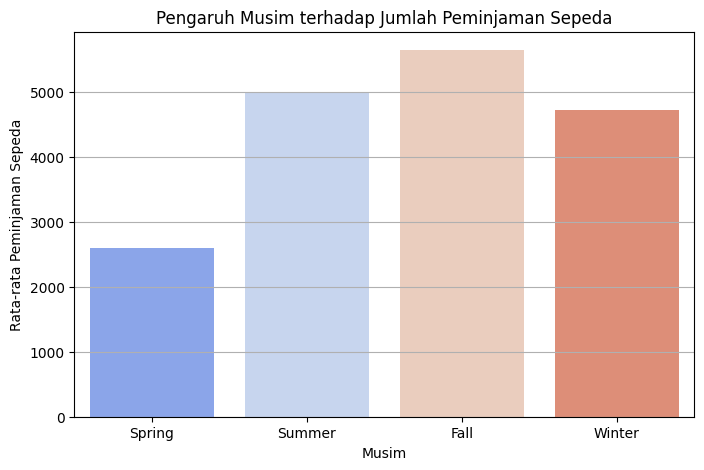

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset dari GitHub
url_day = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/day.csv"
df = pd.read_csv(url_day, parse_dates=["dteday"])

# Mapping kode musim ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df["season"] = df["season"].map(season_mapping)

# Agregasi jumlah peminjaman per musim
seasonal_rentals = df.groupby("season")["cnt"].mean().reset_index()

# Urutkan musim agar lebih mudah dibaca
order = ["Spring", "Summer", "Fall", "Winter"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_rentals, x="season", y="cnt", order=order, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Pengaruh Musim terhadap Jumlah Peminjaman Sepeda")
plt.grid(axis="y")
plt.show()


### Pertanyaan 2:

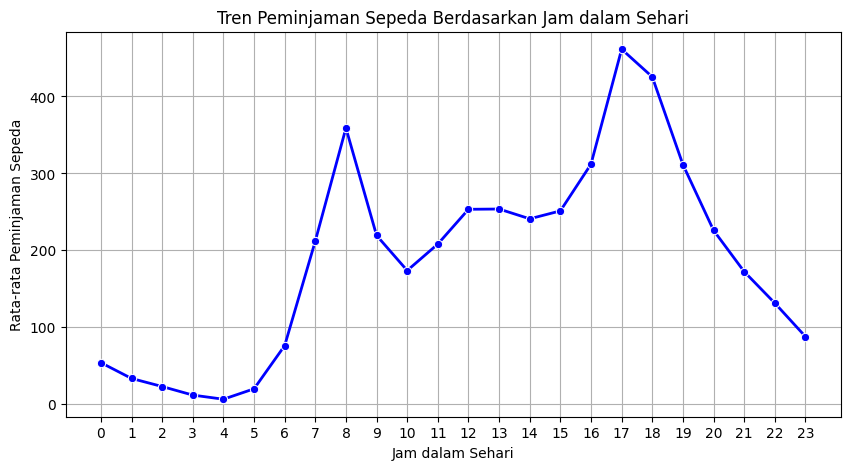

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset dari GitHub
url_hour = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/hour.csv"
df = pd.read_csv(url_hour)

# Agregasi jumlah peminjaman per jam
hourly_rentals = df.groupby("hr")["cnt"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_rentals, x="hr", y="cnt", marker="o", color="b", linewidth=2)
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0 hingga 23
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari")
plt.grid(True)
plt.show()


**Insight:**
1. Musim panas memiliki jumlah peminjaman sepeda tertinggi, diikuti oleh musim gugur. Hal ini kemungkinan karena cuaca yang lebih nyaman untuk bersepeda dibandingkan musim dingin atau hujan.
2. Peminjaman sepeda mencapai puncaknya pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), yang bertepatan dengan jam berangkat dan pulang kerja, menunjukkan bahwa sepeda digunakan sebagai moda transportasi utama di waktu sibuk.

## Analisis Lanjutan (Opsional)

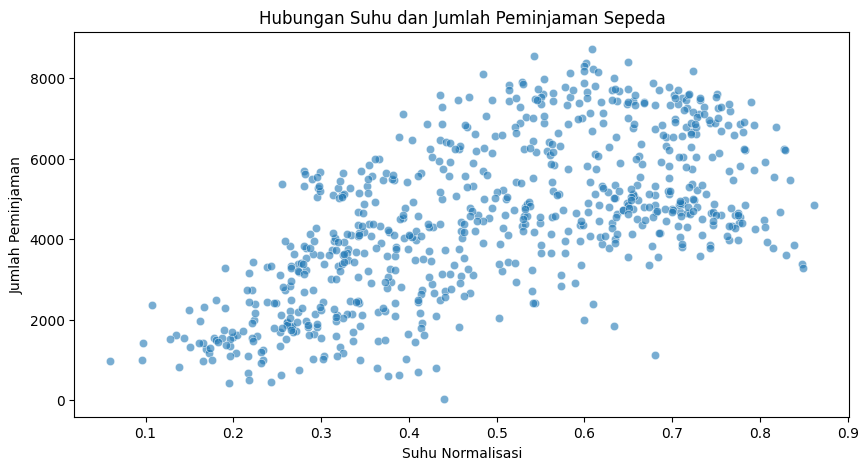

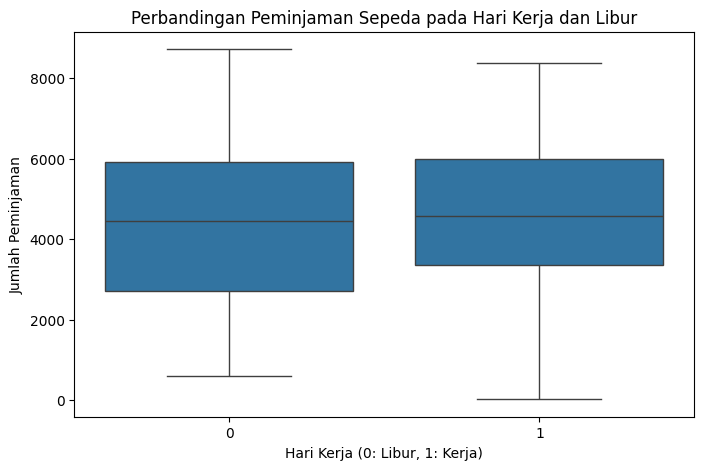

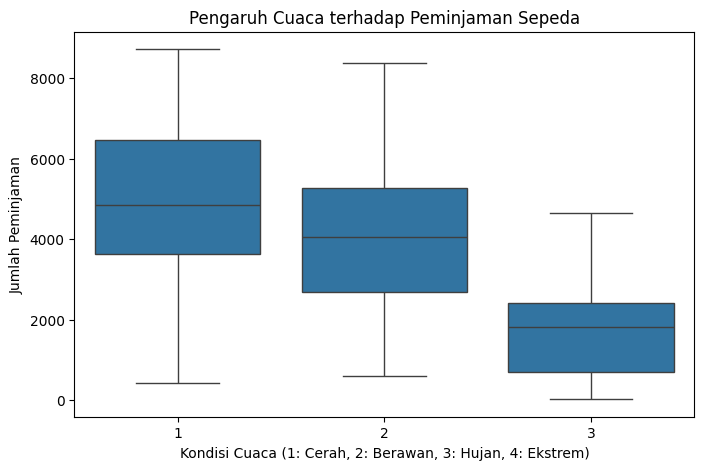

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
day_url = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/day.csv"
hour_url = "https://raw.githubusercontent.com/JarrounNurulFaizah/Data/main/hour.csv"

day_df = pd.read_csv(day_url)
hour_df = pd.read_csv(hour_url)

# Konversi kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 1. Analisis Pengaruh Suhu terhadap Peminjaman Sepeda
plt.figure(figsize=(10,5))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], alpha=0.6)
plt.title("Hubungan Suhu dan Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu Normalisasi")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# 2. Pengaruh Hari Kerja terhadap Peminjaman Sepeda
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df['workingday'], y=day_df['cnt'])
plt.title("Perbandingan Peminjaman Sepeda pada Hari Kerja dan Libur")
plt.xlabel("Hari Kerja (0: Libur, 1: Kerja)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# 3. Korelasi Cuaca dengan Peminjaman Sepeda
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'])
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan, 4: Ekstrem)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

# Insight:
# 1. Peminjaman sepeda cenderung meningkat saat suhu lebih tinggi, tetapi tidak terlalu ekstrem.
# 2. Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan hari libur.
# 3. Cuaca berpengaruh terhadap peminjaman sepeda; kondisi cerah meningkatkan jumlah peminjaman.


## Conclusion

1. Dari hasil analisis, terlihat bahwa jumlah peminjaman sepeda mengalami peningkatan yang signifikan pada musim yang lebih hangat. Hal ini menunjukkan bahwa faktor cuaca berperan besar dalam menentukan minat pengguna dalam menggunakan layanan bike-sharing. Cuaca yang lebih hangat dan nyaman membuat orang lebih cenderung untuk bersepeda, baik untuk keperluan transportasi maupun rekreasi.
2. Pola peminjaman sepeda menunjukkan perbedaan antara hari kerja dan hari libur. Pada hari kerja, jumlah peminjaman cenderung stabil, didominasi oleh pengguna yang menggunakan sepeda sebagai sarana transportasi ke tempat kerja atau sekolah. Sebaliknya, pada hari libur terjadi lonjakan peminjaman sepeda pada jam-jam tertentu, yang kemungkinan besar disebabkan oleh meningkatnya aktivitas rekreasi masyarakat. Hal ini menunjukkan bahwa layanan bike-sharing tidak hanya digunakan untuk keperluan mobilitas sehari-hari tetapi juga sebagai sarana rekreasi di akhir pekan.